<a href="https://colab.research.google.com/github/flaviorv/ml_clustering/blob/main/clustering_tp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

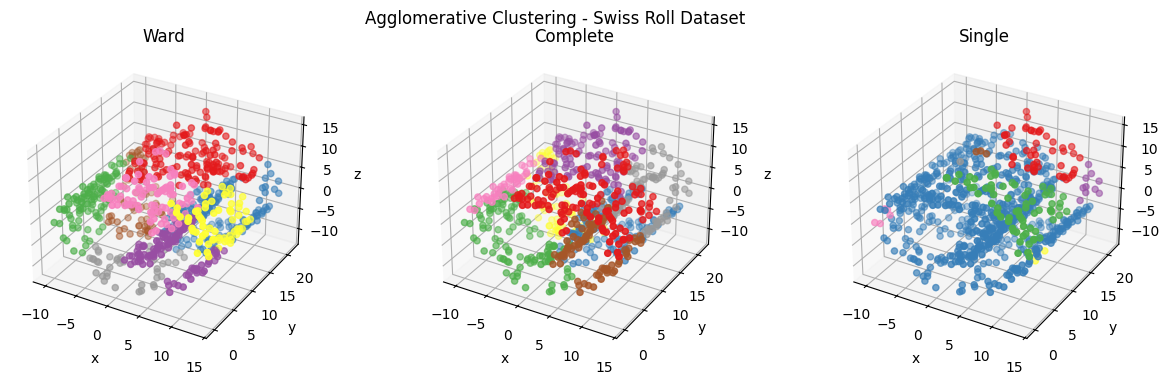

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# loading dataset
x, t = make_swiss_roll(n_samples=800, noise=0.4, random_state=42)

# creating clusters and plotting the grouping for each bottom-up method
n_clusters = 8
methods = ['ward', 'complete', 'single']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), subplot_kw={'projection':'3d'})
for index,  method in enumerate(methods):
  clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
  pred = clusterer.fit_predict(x)
  ax[index].scatter(x[:, 0], x[:, 1], x[:, 2], c=pred, cmap='Set1')
  ax[index].set_title(method.capitalize())
  ax[index].set_xlabel('x')
  ax[index].set_ylabel('y')
  ax[index].set_zlabel('z')

fig.suptitle("Agglomerative Clustering - Swiss Roll Dataset")
plt.show()

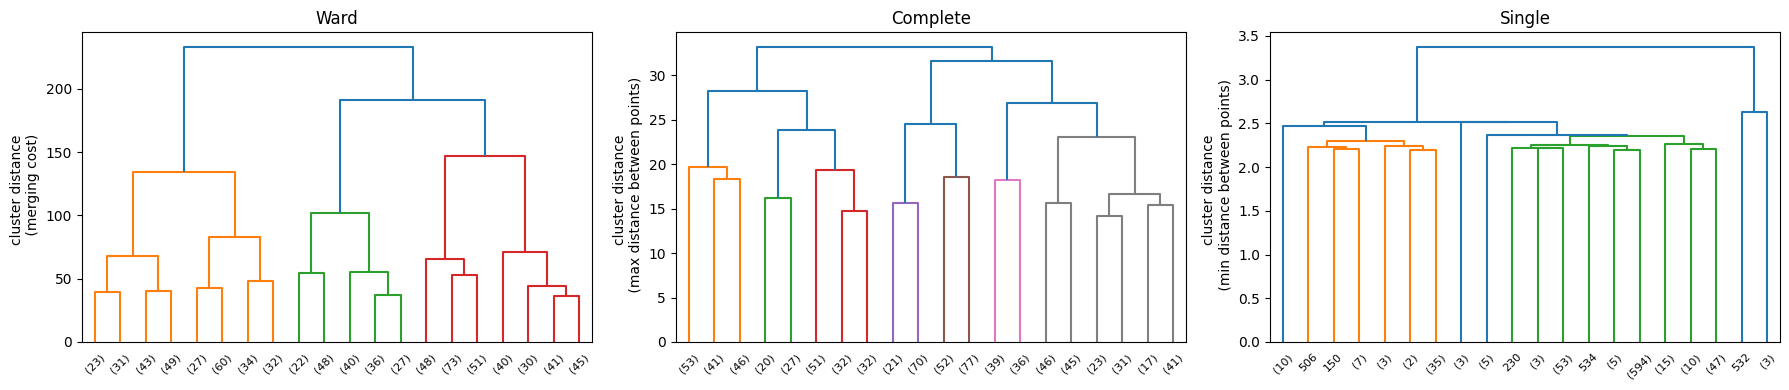

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# dendrogram with lastest merges
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
for index, method in enumerate(methods):
  lin = linkage(x, method)
  den = dendrogram(lin, ax=ax[index], truncate_mode='lastp', p=20, leaf_font_size=8, leaf_rotation=45)
  ax[index].set_title(method.capitalize())
  match(method):
    case 'single':
      ax[index].set_ylabel('cluster distance \n (min distance between points)')
      continue
    case 'complete':
      ax[index].set_ylabel('cluster distance \n (max distance between points)')
      continue
    case 'ward':
      ax[index].set_ylabel('cluster distance \n (merging cost)')
plt.tight_layout()
plt.show()

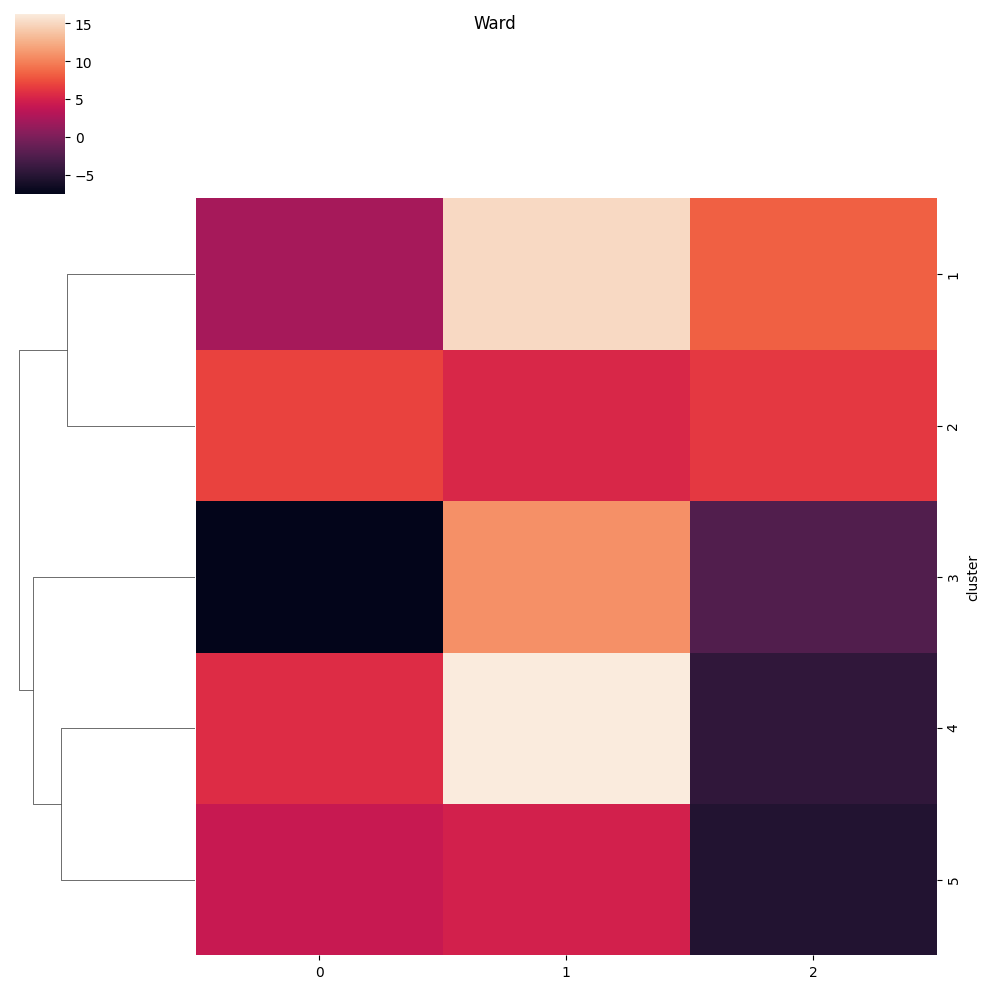

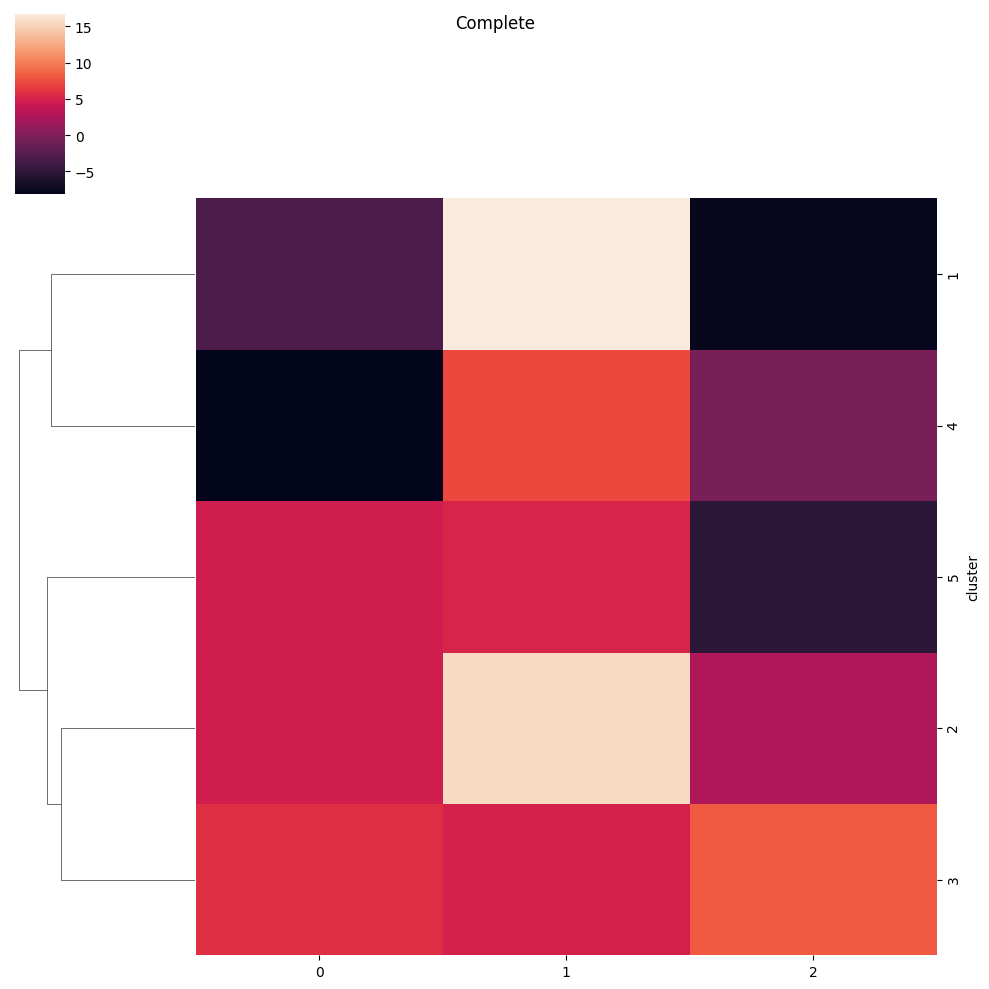

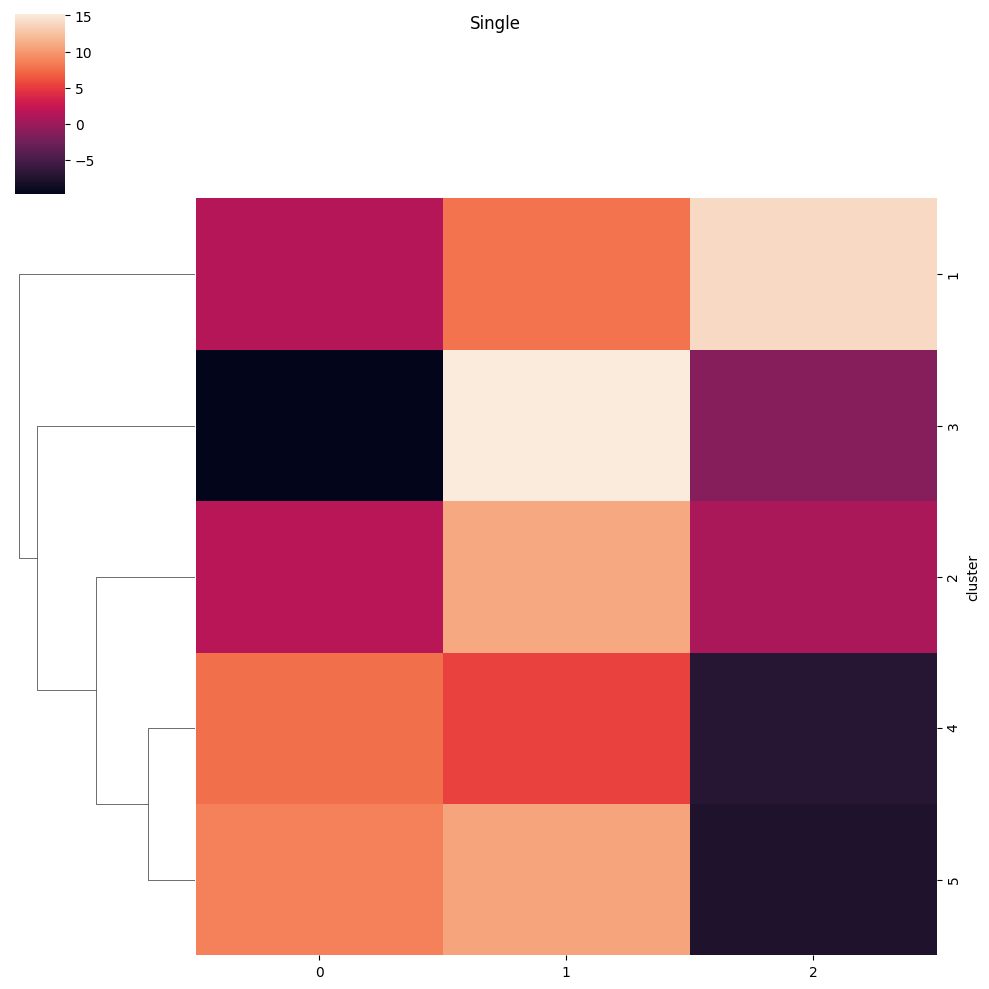

In [ ]:
import seaborn as sns
import pandas as pd

# dendrogram with heatmap (simplified)
df = pd.DataFrame(x)
n_prune = 5
for method in methods:
  lin = linkage(df, method)
  labels = fcluster(lin, t=n_prune, criterion='maxclust')
  df['cluster'] = labels
  pruned = df.groupby('cluster').mean()
  sns.clustermap(pruned, col_cluster=False)
  plt.suptitle(method.capitalize())
  plt.show()

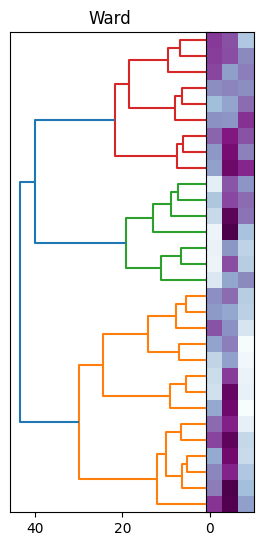

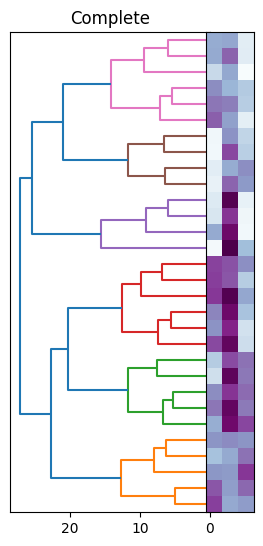

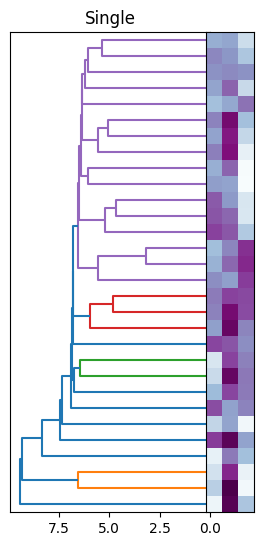

In [ ]:
import numpy as np

# dendrogram with heatmap
df = pd.DataFrame(x, columns=['x', 'y', 'z'])
n_prune = 30

for method in methods:
  lin = linkage(df, method)
  labels = fcluster(lin, t=n_prune, criterion='maxclust')
  df['cluster'] = labels
  pruned = df.groupby('cluster').mean()

  set_labels = False

  # dendrogram
  fig = plt.figure(figsize=(10, 8), facecolor='white')
  axd= fig.add_axes([0.31, 0.1, 0.2, 0.6])
  lin = linkage(pruned, method)
  den = dendrogram(lin, labels=pruned.index, orientation='left', no_labels=not set_labels)
  sorted = pruned.iloc[den['leaves'][::-1]]

  # heatmap
  axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
  cax = axm.matshow(sorted,  interpolation='nearest', cmap='BuPu')
  if (set_labels):
    axm.set_yticks(np.arange(sorted.shape[0]))
    axm.set_yticklabels(sorted.index)
    axm.set_xticks(np.arange(sorted.shape[1]))
    axm.set_xticklabels(sorted.columns)
  else:
    axm.set_yticks([])
    axm.set_xticks([])
  axd.set_title(method.capitalize())
  plt.show()